# **Final Project: Twitter Bot Detection**

*For details pls check the project report

## **PART 1 - DATASET**

### **1.1 DESCRIPTION**

In [1]:
import pandas as pd

# Accounts
fake = pd.read_csv("./dataset/fake/users.csv")
genuine = pd.read_csv("./dataset/genuine/users.csv")
social1 = pd.read_csv("./dataset/social1/users.csv")
social2 = pd.read_csv("./dataset/social2/users.csv")
social3 = pd.read_csv("./dataset/social3/users.csv")
traditional2 = pd.read_csv("./dataset/traditional2/users.csv")
traditional3 = pd.read_csv("./dataset/traditional3/users.csv")
traditional4 = pd.read_csv("./dataset/traditional4/users.csv")

In [2]:
from sklearn.utils import shuffle

# Concatenate All Dataframe as One
social = pd.concat([social1, social2, social3])
traditional = pd.concat([traditional2, traditional3, traditional4])
bot_accounts = pd.concat([social, traditional, fake])

bot_accounts['is_bot'] = 1
genuine['is_bot'] = 0

accounts = pd.concat([bot_accounts, genuine])
accounts = shuffle(accounts)
accounts = accounts.fillna('')

In [3]:
# Tweets
fake_t = pd.read_csv("./dataset/fake/tweets.csv", encoding='latin-1')
genuine_t = pd.read_csv("./dataset/genuine/tweets.csv", encoding='latin-1')
social1_t = pd.read_csv("./dataset/social1/tweets.csv", encoding='latin-1')
social2_t = pd.read_csv("./dataset/social2/tweets.csv", encoding='latin-1')
social3_t = pd.read_csv("./dataset/social3/tweets.csv", encoding='latin-1')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Concatenate All Dataframe as One
social_t = pd.concat([social1_t, social2_t, social3_t])
bot_accounts_t = pd.concat([social_t, fake_t])

bot_accounts_t['is_bot'] = 1
genuine_t['is_bot'] = 0
genuine_t = genuine_t[genuine_t['user_id'].notna()]
genuine_t['user_id'].astype('int64')


tweets = pd.concat([bot_accounts_t, genuine_t])
tweets = shuffle(tweets)
tweets = tweets.fillna('')

tweets['time'] = pd.to_datetime(tweets['timestamp']).dt.time
tweets['time'] = pd.to_timedelta(tweets.time.astype(str))

### **1.2 DATA STATISTICS**

**images are in project reports*

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
"""Number of Twitter Accounts Per Dataset"""

sns.set_style("whitegrid")
num_accounts = {'Fake': len(fake.index), 'Human': len(genuine.index), 'Political': len(social1.index),
                'Apps Promo': len(social2.index), 'Amazon': len(social3.index), 'Scam URL': len(traditional2.index),
                'Job Offers1': len(traditional3.index), 'Job Offers2': len(traditional4.index)}

In [ ]:
"""Average Number of Followers Per Account Per Dataset"""

avg_followers = {'Fake': fake["followers_count"].sum()/len(fake.index), 'Human': genuine["followers_count"].sum()/len(genuine.index),
                'Political': social1["followers_count"].sum()/len(social1.index), 'Apps Promo': social2["followers_count"].sum()/len(social2.index),
                'Amazon': social3["followers_count"].sum()/len(social3.index), 'Scam URL': traditional2["followers_count"].sum()/len(traditional2.index),
                'Job Offers1': traditional3["followers_count"].sum()/len(traditional3.index),
                'Job Offers2': traditional4["followers_count"].sum()/len(traditional4.index)}

In [ ]:
"""Average Number of Friends Per Account Per Dataset"""

avg_friends = {'Fake': fake["friends_count"].sum()/len(fake.index), 'Human': genuine["friends_count"].sum()/len(genuine.index),
                'Political': social1["friends_count"].sum()/len(social1.index), 'Apps Promo': social2["friends_count"].sum()/len(social2.index),
                'Amazon': social3["friends_count"].sum()/len(social3.index), 'Scam URL': traditional2["friends_count"].sum()/len(traditional2.index),
                'Job Offers1': traditional3["friends_count"].sum()/len(traditional3.index),
                'Job Offers2': traditional4["friends_count"].sum()/len(traditional4.index)}

In [ ]:
"""Average Number of Tweets Per Account Per Dataset"""

avg_tweets = {'Fake': fake["statuses_count"].sum()/len(fake.index), 'Human': genuine["statuses_count"].sum()/len(genuine.index),
                'Political': social1["statuses_count"].sum()/len(social1.index), 'Apps Promo': social2["statuses_count"].sum()/len(social2.index),
                'Amazon': social3["statuses_count"].sum()/len(social3.index), 'Scam URL': traditional2["statuses_count"].sum()/len(traditional2.index),
                'Job Offers1': traditional3["statuses_count"].sum()/len(traditional3.index),
                'Job Offers2': traditional4["statuses_count"].sum()/len(traditional4.index)}

In [ ]:
"""Average Favourites Per Account Per Dataset"""

avg_fav = {'Fake': fake["favourites_count"].sum()/len(fake.index), 'Human': genuine["favourites_count"].sum()/len(genuine.index),
                'Political': social1["favourites_count"].sum()/len(social1.index), 'Apps Promo': social2["favourites_count"].sum()/len(social2.index),
                'Amazon': social3["favourites_count"].sum()/len(social3.index), 'Scam URL': traditional2["favourites_count"].sum()/len(traditional2.index),
                'Job Offers1': traditional3["favourites_count"].sum()/len(traditional3.index),
                'Job Offers2': traditional4["favourites_count"].sum()/len(traditional4.index)}

In [ ]:
"""Average Listed Count Per Account Per Dataset"""

avg_fav = {'Fake': fake["listed_count"].sum()/len(fake.index), 'Human': genuine["listed_count"].sum()/len(genuine.index),
                'Political': social1["listed_count"].sum()/len(social1.index), 'Apps Promo': social2["listed_count"].sum()/len(social2.index),
                'Amazon': social3["listed_count"].sum()/len(social3.index), 'Scam URL': traditional2["listed_count"].sum()/len(traditional2.index),
                'Job Offers1': traditional3["listed_count"].sum()/len(traditional3.index),
                'Job Offers2': traditional4["listed_count"].sum()/len(traditional4.index)}

In [ ]:
counts = [0, 0]
sums = [0, 0]

for index, row in bot_accounts.iterrows():
  result = scoringPostAllDayNight(row)
  if result == 0:
    continue
  else:
    sums[0] += result
    counts[0] += 1

for index, row in genuine.iterrows():
  result = scoringPostAllDayNight(row)
  if result == 0:
    continue
  else:
    sums[1] += result
    counts[1] += 1

average = [sums[0]/counts[0], sums[1]/counts[1]] # [34.83, 217.12]

In [ ]:
keys = list(avg_fav.keys())
vals = [int(avg_fav[k]) for k in keys]
plt.figure(figsize=(15,8))
#plt.style.use("dark_background")
ax = sns.barplot(x = keys, y = vals)
ax.set_title('Average Number of Tweets Per Account Per Dataset')
ax.set_ylabel('Average Number of Tweets')
#ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
#ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.savefig('./figures/fig4.png', transparent=True)

## **PART 2 - METHODS & ANALYSIS**

### **2.1 USER PROFILE**

In [6]:
def scoringName(user):
  return 1 if user['name'] == '' else 0
def scoringGeo(user):
  return 1 if user['geo_enabled'] == '' else 0
def scoringFollower(user):
  return 1 if user['followers_count'] < 30 else 0
def scoringFavourites(user):
  return 1 if user['favourites_count'] < 30 else 0
def scoringBannerURL(user):
  return 1 if user['profile_banner_url'] != '' else 0
def scoringImageURL(user):
  return 1 if user['profile_image_url'] == '' else 0
def scoringDefaultImage(user):
  return 1 if user['default_profile_image'] != '' else 0
def scoringDescription(user):
  return 1 if user['description'] == '' else 0
def scoringVerified(user):
  return 1 if user['verified'] != '' else 0
def scoringProtected(user):
  return 1 if user['protected'] == '' else 0
def scoringFriendsCount(user):
  return 1 if user['friends_count'] > 1000 else 0


### **2.2 ACCOUNT ACTIVITY**

In [7]:
tweets_date = tweets[['user_id', 'time']]

# Time Blocks
EARLY_MORNING_FROM = pd.to_timedelta('06:00:00')
EARLY_MORNING_TO = pd.to_timedelta('08:59:59')
LATE_MORNING_FROM = pd.to_timedelta('09:00:00')
LATE_MORNING_TO = pd.to_timedelta('11:59:59')

EARLY_AFTERNOON_FROM = pd.to_timedelta('12:00:00')
EARLY_AFTERNOON_TO = pd.to_timedelta('14:59:59')
LATE_AFTERNOON_FROM = pd.to_timedelta('15:00:00')
LATE_AFTERNOON_TO = pd.to_timedelta('17:59:59')

EARLY_EVENING_FROM = pd.to_timedelta('18:00:00')
EARLY_EVENING_TO = pd.to_timedelta('20:59:59')
LATE_EVENING_FROM = pd.to_timedelta('21:00:00')
LATE_EVENING_TO = pd.to_timedelta('23:59:59')

EARLY_NIGHT_FROM = pd.to_timedelta('00:00:01')
EARLY_NIGHT_TO = pd.to_timedelta('2:59:59')
LATE_NIGHT_FROM = pd.to_timedelta('03:00:00')
LATE_NIGHT_TO = pd.to_timedelta('5:59:59')

In [8]:
def scoringNoTweets(user):
  return 1 if user['statuses_count'] == 0 else 0
def scoringLessTweets(user):
  return 1 if user['statuses_count'] < 1000 else 0
def scoringPostAllDayNight(user):
  userID = int(user['id'])
  userTweets = tweets_date[tweets_date['user_id'] == userID]
  count = [0, 0, 0, 0, 0, 0, 0, 0] # 8 Timeblocks
  for index, row in userTweets.iterrows():
    if row['time'] >= EARLY_MORNING_FROM and row['time'] <= EARLY_MORNING_TO:
      count[0] += 1
    elif row['time'] >= LATE_MORNING_FROM and row['time'] <= LATE_MORNING_TO:
      count[1] += 1
    elif row['time'] >= EARLY_AFTERNOON_FROM and row['time'] <= EARLY_AFTERNOON_TO:
      count[2] += 1
    elif row['time'] >= LATE_AFTERNOON_FROM and row['time'] <= LATE_AFTERNOON_TO:
      count[3] += 1
    elif row['time'] >= EARLY_EVENING_FROM and row['time'] <= EARLY_EVENING_TO:
      count[4] += 1
    elif row['time'] >= LATE_EVENING_FROM and row['time'] <= LATE_EVENING_TO:
      count[5] += 1
    elif row['time'] >= EARLY_NIGHT_FROM and row['time'] <= EARLY_NIGHT_TO:
      count[6] += 1
    elif row['time'] >= LATE_NIGHT_FROM and row['time'] <= LATE_NIGHT_TO:
      count[7] += 1
  mean = sum(count) / len(count)
  variance = sum([((x - mean) ** 2) for x in count]) / len(count)
  res = variance ** 0.5
  if res < 100:
    return 1
  else:
    return 0

### **2.3 TEXT MINING**

In [9]:
from itertools import product
import numpy as np
import editdistance

In [10]:
def scoringLevenshtein(user):
  userID = int(user['id'])
  text = tweets[tweets['user_id'] == userID]['text']
  text = text.str.replace(' ','')
  if len(text.index) == 0:
    return 0

  LevD = np.empty(text.shape[0]**2, dtype=int)
  for i, x in enumerate(product(text, repeat=2)):
    LevD[i] = editdistance.eval(*x)
  LevD = pd.DataFrame(LevD.reshape(-1, text.shape[0]))
  LevD_Mean = LevD.mean()
  return LevD_Mean.mean()
def scoringBotName(user):
  name = user['name'].lower()
  keywords = ['bot', 'prize', 'lottery', 'insurance', 'mortgage']
  res = [ele for ele in keywords if(ele in name)]
  return bool(res)

### **2.4 SCORING**

In [32]:
def setY(user):
  return 1 if user['is_bot'] == 1 else 0

score = pd.DataFrame()
score['id'] = accounts['id']

In [33]:
Functions = {
  # Profiles
  #scoringName: 'screen_name',
  scoringGeo: 'location',
  scoringFollower: 'less_follow',
  scoringFavourites: 'less_favourites',
  scoringBannerURL: 'banner_link',
  #scoringImageURL: 'image_link',
  #scoringDefaultImage: 'avatar',
  scoringDescription: 'description',
  scoringVerified: 'verified',
  scoringProtected: 'protected',
  scoringFriendsCount: 'friends',

  # Account Activities
  scoringNoTweets: 'no_tweets',
  scoringLessTweets: 'less_tweets',

  # Text Mining
  scoringBotName: 'bot_name',

  # Assign Y
  setY: 'is_bot',
}

In [34]:
for func in Functions.keys():
  score[Functions[func]] = accounts.apply(lambda item: func(item), axis = 1)

In [14]:
# This One is Computationally Expensive, Best Run it Alone!
score['post_alltime'] = accounts.apply(lambda item: scoringPostAllDayNight(item), axis = 1)

## **PART 3 - TRAINING DATA**

### **3.1 PROCESS & SPLIT DATA**

In [35]:
from sklearn.model_selection import KFold

new_score = score.copy()
del new_score['id']

if 'is_bot' in new_score:
  y = new_score['is_bot'].values
  del new_score['is_bot']
  X = new_score.values

In [36]:
kf = KFold(n_splits=3, random_state=None)

### **3.2 LOGISTIC REGRESSION**

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

lr = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

for train_index , test_index in kf.split(X):
  X_train = X[train_index]
  y_train = y[train_index]
    
  X_test = X[test_index]
  y_test = y[test_index]

  lr.fit(X_train, y_train)
  y_hat = lr.predict(X_test)

  print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_hat))
  print('\nAccuracy: ', accuracy_score(y_test, y_hat))


Confusion Matrix:
 [[1101   91]
 [  28 3236]]

Accuracy:  0.973294434470377

Confusion Matrix:
 [[1038   91]
 [  42 3285]]

Accuracy:  0.9701526032315978

Confusion Matrix:
 [[1051  102]
 [  35 3268]]

Accuracy:  0.9692549371633752


### **3.3 FEATURE SCALING**

In [38]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [39]:
lr.fit(X_train_scaled, y_train)
y_hat = lr.predict(X_test_scaled)
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_hat))
print('\nAccuracy: ', accuracy_score(y_test, y_hat))


Confusion Matrix:
 [[1052  101]
 [  35 3268]]

Accuracy:  0.9694793536804309


### **3.4 WEIGHTS ANALYSIS**

In [40]:
weights = lr.coef_.T
variable_names = new_score.columns
weight_dic = {}
for coef, name in zip(weights, variable_names):
  print(name, 'has weight of', coef[0])
  weight_dic[name] = coef[0]

location has weight of 0.20944436549887824
less_follow has weight of 0.16616888032859065
less_favourites has weight of 2.4180451327671473
banner_link has weight of -0.8886271319952118
description has weight of -0.13898354328893683
verified has weight of -0.20081137388658707
protected has weight of 0.5441206437800787
friends has weight of 0.3080373721370141
no_tweets has weight of 0.2791572547268173
less_tweets has weight of 0.8072596975401757
bot_name has weight of 0.1386490552193722


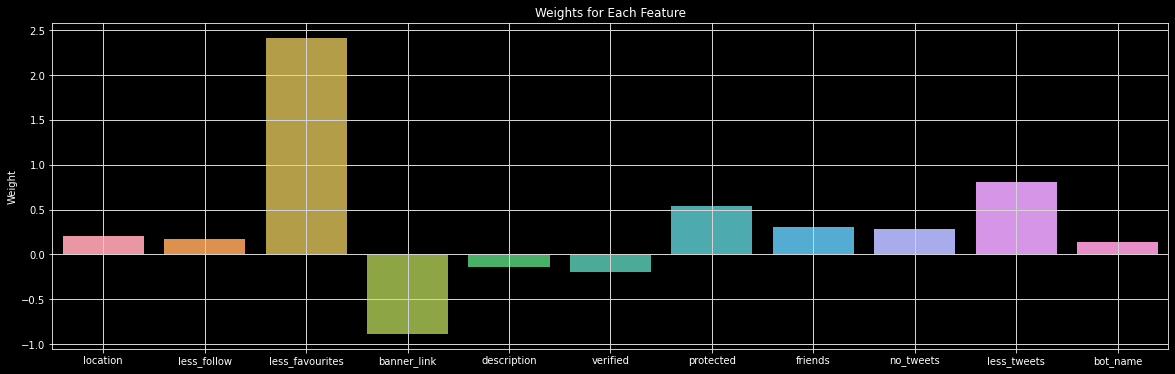

In [41]:
weight_dic.pop("is_bot", None)

keys = list(weight_dic.keys())
vals = [weight_dic[k] for k in keys]
plt.figure(figsize=(20,6))
plt.style.use("dark_background")
ax = sns.barplot(x = keys, y = vals)
ax.set_title('Weights for Each Feature')
ax.set_ylabel('Weight')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.savefig('./figures/fig6.png', transparent=True)

### **3.5 SUPPORT VECTOR MACHINE**

In [42]:
from sklearn.svm import SVC

svm = SVC(C = 0.5, kernel = 'rbf', degree = 3, gamma = 'auto')
svm.fit(X_train_scaled, y_train)

y_hat = svm.predict(X_test_scaled)

print('\nConfusion Matrix: Support Vector Machine\n', confusion_matrix(y_test, y_hat))
print('\nReport: Support Vector Machine\n', classification_report(y_test, y_hat))


Confusion Matrix: Support Vector Machine
 [[1050  103]
 [  34 3269]]

Report: Support Vector Machine
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      1153
           1       0.97      0.99      0.98      3303

    accuracy                           0.97      4456
   macro avg       0.97      0.95      0.96      4456
weighted avg       0.97      0.97      0.97      4456



## **PART 4 - ENSEMBLE METHODS**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model_1 = LogisticRegression(penalty='l2', C=1.0, class_weight=None)
model_2 = SVC(C = 0.5, kernel = 'rbf', degree = 3, gamma = 'auto')
model_3 = RandomForestClassifier()
model_4 = DecisionTreeClassifier()
model_5 = KNeighborsClassifier()

models = [('lr',model_1),('svm',model_2),('rf',model_3),('dt',model_4),('knn',model_5)]

### **4.1 HARD VOTING**

In [24]:
from sklearn.ensemble import VotingClassifier

model_mv = VotingClassifier(estimators=models, voting='hard')
model_mv.fit(X_train_scaled, y_train)
y_hat_mv = model_mv.predict(X_test_scaled)

In [25]:
print('\nConfusion Matrix: Max Voting\n', confusion_matrix(y_test, y_hat_mv))
print('\nReport: Max Voting\n', classification_report(y_test, y_hat_mv))


Confusion Matrix: Max Voting
 [[1078   75]
 [  49 3254]]

Report: Max Voting
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1153
           1       0.98      0.99      0.98      3303

    accuracy                           0.97      4456
   macro avg       0.97      0.96      0.96      4456
weighted avg       0.97      0.97      0.97      4456



### **4.2 Stacking**

In [26]:
from sklearn.ensemble import StackingClassifier

model_st = StackingClassifier(estimators=models, final_estimator=model_1)
model_st.fit(X_train_scaled, y_train)
y_hat_st = model_st.predict(X_test_scaled)

In [27]:
print('\nConfusion Matrix: Stacking\n', confusion_matrix(y_test, y_hat_st))
print('\nReport: Stacking\n', classification_report(y_test, y_hat_st))


Confusion Matrix: Stacking
 [[1068   85]
 [  46 3257]]

Report: Stacking
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1153
           1       0.97      0.99      0.98      3303

    accuracy                           0.97      4456
   macro avg       0.97      0.96      0.96      4456
weighted avg       0.97      0.97      0.97      4456



### **4.3 Bagging**

In [28]:
from sklearn.ensemble import BaggingRegressor

model_bg = BaggingRegressor(base_estimator=model_2)
model_bg.fit(X_train_scaled, y_train)
y_hat_bg = model_bg.predict(X_test_scaled)
y_hat_bg = [int(y_hat_bg) for y_hat_bg in y_hat_bg]

In [29]:
print('\nConfusion Matrix: Bagging\n', confusion_matrix(y_test, y_hat_bg))
print('\nReport: Bagging\n', classification_report(y_test, y_hat_bg))


Confusion Matrix: Bagging
 [[1072   81]
 [  46 3257]]

Report: Bagging
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1153
           1       0.98      0.99      0.98      3303

    accuracy                           0.97      4456
   macro avg       0.97      0.96      0.96      4456
weighted avg       0.97      0.97      0.97      4456



### **4.4 Boosting**

In [30]:
from sklearn.ensemble import AdaBoostClassifier

model_bo = AdaBoostClassifier()
model_bo.fit(X_train_scaled, y_train)
y_hat_bo = model_bo.predict(X_test_scaled)

In [31]:
print('\nConfusion Matrix: Boosting\n', confusion_matrix(y_test, y_hat_bo))
print('\nReport: Boosting\n', classification_report(y_test, y_hat_bo))


Confusion Matrix: Boosting
 [[1050  103]
 [  32 3271]]

Report: Boosting
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      1153
           1       0.97      0.99      0.98      3303

    accuracy                           0.97      4456
   macro avg       0.97      0.95      0.96      4456
weighted avg       0.97      0.97      0.97      4456



## **PART 5 - UNUSED CODES**

In [ ]:
from sklearn.model_selection import train_test_split

new_score = score.drop('id', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(new_score, new_score["is_bot"], train_size = 0.6)

In [ ]:
levd = [0,0]
count = [0,0]
print('START: ', counts[0])
for index, row in bot_accounts.iterrows():
  print('LOOP: ', counts[0])
  result = scoringLevenshtein(row)
  if result == 0:
    print('END1: ', counts[0])
    continue
  else:
    print('END2: ', counts[0])
    levd[0] += result
    counts[0] += 1

for index, row in genuine.iterrows():
  result = scoringLevenshtein(row)
  if result == 0:
    continue
  else:
    levd[0] += result
    counts[0] += 1

average = [levd[0]/counts[0], levd[1]/counts[1]]